**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [17]:
def errors(x):
    return np.sqrt(x)

np.random.seed(10)    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


x = np.random.randint(0,10,(1,100))
line = line(2,x,5)


Text(0.5,1,'FIGURE 1: Plot showing the error values of a given line')

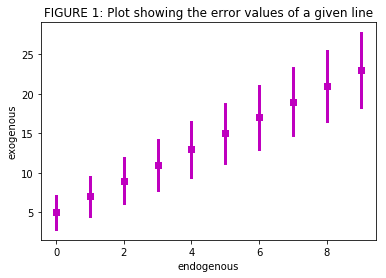

In [3]:

plt.errorbar(
    x[0][:],  # X
    line[0][:], # Y
    yerr=np.sqrt(line[0][:])
    ,     # Y-errors
    label="Error bars plot",
    fmt="ms", # format line like for plot()
    linewidth=3	# width of plot line
    )


plt.ylabel('exogenous')
plt.xlabel('endogenous')

plt.title('FIGURE 1: Plot showing the error values of a given line')

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [5]:
# THE RIGHT WAY
lRes = sm.OLS(line[0][:], sm.add_constant(x[0][:])).fit()


In [18]:
x_intercept = sm.add_constant(x)


print(x)
print(lRes.predict())
print(line[0])

[[9 4 0 1 9 0 1 8 9 0 8 6 4 3 0 4 6 8 1 8 4 1 3 6 5 3 9 6 9 1 9 4 2 6 7 8 8
  9 2 0 6 7 8 1 7 1 4 0 8 5 4 7 8 8 2 6 2 8 8 6 6 5 6 0 0 6 9 1 8 9 1 2 8 9
  9 5 0 2 7 3 0 4 2 0 3 3 1 2 5 9 0 1 0 1 9 0 9 2 1 1]]
[ 23.  13.   5.   7.  23.   5.   7.  21.  23.   5.  21.  17.  13.  11.   5.
  13.  17.  21.   7.  21.  13.   7.  11.  17.  15.  11.  23.  17.  23.   7.
  23.  13.   9.  17.  19.  21.  21.  23.   9.   5.  17.  19.  21.   7.  19.
   7.  13.   5.  21.  15.  13.  19.  21.  21.   9.  17.   9.  21.  21.  17.
  17.  15.  17.   5.   5.  17.  23.   7.  21.  23.   7.   9.  21.  23.  23.
  15.   5.   9.  19.  11.   5.  13.   9.   5.  11.  11.   7.   9.  15.  23.
   5.   7.   5.   7.  23.   5.  23.   9.   7.   7.]
[23 13  5  7 23  5  7 21 23  5 21 17 13 11  5 13 17 21  7 21 13  7 11 17 15
 11 23 17 23  7 23 13  9 17 19 21 21 23  9  5 17 19 21  7 19  7 13  5 21 15
 13 19 21 21  9 17  9 21 21 17 17 15 17  5  5 17 23  7 21 23  7  9 21 23 23
 15  5  9 19 11  5 13  9  5 11 11  7  9 15 23  5  7  5  

In [6]:
lRes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.844e+34
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        16:47:24   Log-Likelihood:                 3387.5
No. Observations:                 100   AIC:                            -6771.
Df Residuals:                      98   BIC:                            -6766.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.0000   8.11e-17   6.17e+16      0.000         5.000     5.000
x1             2.0000   1.47e-17   1.36e+17      0.000         2.000     2.000
==============================================================================
Omnibus:                       30.170   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.509
Skew:                           0.980   Prob(JB):                     3.52e-05
Kurtosis:                       1.960   Cond. No.                         9.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#THE WRONG WAY
smfit = smf.OLS(line[0][:], x[0][:]).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2617.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.17e-73
Time:                        16:47:24   Log-Likelihood:                -249.35
No. Observations:                 100   AIC:                             500.7
Df Residuals:                      99   BIC:                             503.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.7365      0.053     51.159      0.000         2.630     2.843
==============================================================================
Omnibus:                      191.959   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.232
Skew:                          -0.023   Prob(JB):                      0.00989
Kurtosis:                       1.512   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

Text(0,0.5,'Exogenous variable')

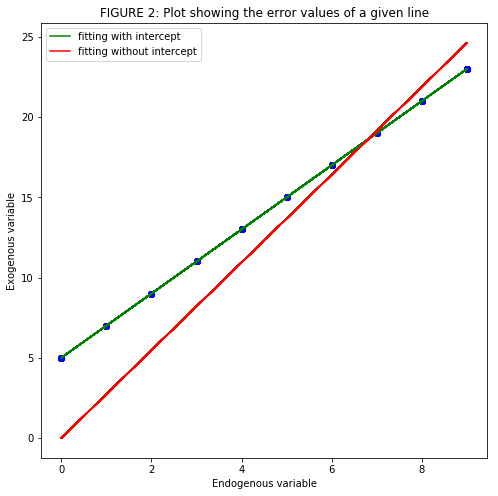

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(x[0][:], line[0][:], 'bo')
ax.plot(x[0][:] ,lRes.predict(),'g' , label='fitting with intercept')
ax.plot(x[0][:] ,smfit.predict() ,'r' , label='fitting without intercept')
ax.legend()
ax.set_title('FIGURE 2: Plot showing the error values of a given line')
ax.set_xlabel('Endogenous variable')
ax.set_ylabel('Exogenous variable')

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [9]:
def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    

x = np.random.randint(0,50,(1,10))
line2 = line(12,x,232)


Text(0.5,1,'FIGURE 3: Plot showing the error values of a given line')

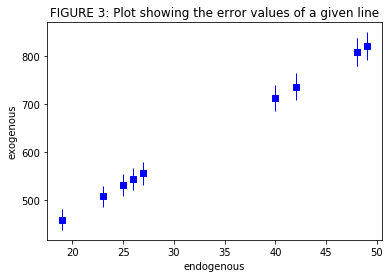

In [10]:
plt.errorbar(
    x[0][:],  # X
    line2[0][:], # Y
    yerr=np.sqrt(line2[0][:])
    ,     # Y-errors
    label="Error bars plot",
    fmt="bs", # format line like for plot()
    linewidth=1)

plt.ylabel('exogenous')
plt.xlabel('endogenous')

plt.title('FIGURE 3: Plot showing the error values of a given line')

# 6. repeat step 3

In [11]:
l_wti = smf.OLS(line2[0][:], x[0][:]).fit()
l_wi = smf.OLS(line2[0][:], sm.add_constant(x[0][:])).fit()

print('Result without intercept')
print(l_wti.summary())
print('Result with intercept')
print(l_wi.summary())

Result without intercept
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     769.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.00e-10
Time:                        16:47:24   Log-Likelihood:                -56.845
No. Observations:                  10   AIC:                             115.7
Df Residuals:                       9   BIC:                             116.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            18.0561      

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Text(0.5,1,'FIGURE 4: Fitting a line using statsmodels')

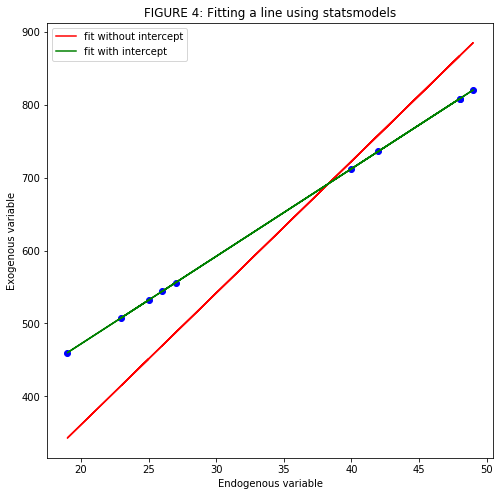

In [12]:
fig, ax =plt.subplots(figsize=(8,8))
ax.plot(x[:][0], line2[:][0], 'bo')
ax.plot(x[:][0], l_wti.predict() ,'r' , label='fit without intercept')
ax.plot(x[:][0], l_wi.predict() ,'g' , label='fit with intercept')
ax.legend()
ax.set_xlabel('Endogenous variable')
ax.set_ylabel('Exogenous variable')
ax.set_title('FIGURE 4: Fitting a line using statsmodels')              

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [13]:
#calculating the variance of each observation
weights = []

for obs in line2[0][:]:
    variance = (obs - line2[0][:].mean())**2
    weights.append(variance)

In [14]:
weights = np.array(weights)

In [15]:
wls_model = sm.WLS(line2[0][:],sm.add_constant(x[0][:]),weight= 1./weights).fit()

print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.029e+30
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          6.61e-119
Time:                        16:47:24   Log-Likelihood:                 275.34
No. Observations:                  10   AIC:                            -546.7
Df Residuals:                       8   BIC:                            -546.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        232.0000   3.07e-13   7.55e+14      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### Deciding the weights for each observation

for each observation, first I calculated how much it differed from the mean , and then I used the square of this difference as a weight to divide the observsations for weighted linear regression.